# 📊COVID-19 in India Data Analysis

### Step 1: Import Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from ipywidgets import interact, Dropdown

### Step 2: Load Data

In [4]:
covid_df = pd.read_csv("../Clean_data/covid_19_india_cleaned.csv")
vaccine_df = pd.read_csv("../Clean_data/covid_vaccine_statewise_cleaned.csv")

### Step 3: Checking Quality of Data 

In [21]:
# Convert the 'Date' & 'Vaccine_Date' column from object format to datetime
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
vaccine_df['Vaccine_Date'] = pd.to_datetime(vaccine_df['Vaccine_Date'])

In [22]:
# Create Useful Columns
covid_df['Year'] = covid_df['Date'].dt.year
covid_df['Month'] = covid_df['Date'].dt.month
covid_df['Month_Name'] = covid_df['Date'].dt.month_name()
covid_df['Day'] = covid_df['Date'].dt.day

In [25]:
# Create Useful Columns
vaccine_df['Year'] = vaccine_df['Vaccine_Date'].dt.year
vaccine_df['Month'] = vaccine_df['Vaccine_Date'].dt.month
vaccine_df['Month_Name'] = vaccine_df['Vaccine_Date'].dt.month_name()
vaccine_df['Day'] = vaccine_df['Vaccine_Date'].dt.day

In [26]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases,Year,Month,Month_Name,Day
0,2020-01-30,Kerala,0,0,1,1,2020,1,January,30
1,2020-01-31,Kerala,0,0,1,1,2020,1,January,31
2,2020-02-01,Kerala,0,0,2,2,2020,2,February,1
3,2020-02-02,Kerala,0,0,3,3,2020,2,February,2
4,2020-02-03,Kerala,0,0,3,3,2020,2,February,3


In [27]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18110 non-null  datetime64[ns]
 1   State/UnionTerritory  18110 non-null  object        
 2   Cured                 18110 non-null  int64         
 3   Deaths                18110 non-null  int64         
 4   Confirmed             18110 non-null  int64         
 5   Active_Cases          18110 non-null  int64         
 6   Year                  18110 non-null  int32         
 7   Month                 18110 non-null  int32         
 8   Month_Name            18110 non-null  object        
 9   Day                   18110 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(4), object(2)
memory usage: 1.2+ MB


In [28]:
#check for null values
pd.isnull(covid_df).sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
Active_Cases            0
Year                    0
Month                   0
Month_Name              0
Day                     0
dtype: int64

In [29]:
vaccine_df.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),...,Female,Transgender,18-44 Years,45-60 Years,60+ Years,Total Individuals Vaccinated,Year,Month,Month_Name,Day
0,2021-01-16,Cases being reassigned to states,48276.0,3455.0,2957.0,48276.0,0.0,579.0,47697.0,0.0,...,24517.0,2.0,NaN,NaN,NaN,48276.0,2021,1,January,16
1,2021-01-17,Cases being reassigned to states,58604.0,8532.0,4954.0,58604.0,0.0,635.0,57969.0,0.0,...,31252.0,4.0,NaN,NaN,NaN,58604.0,2021,1,January,17
2,2021-01-18,Cases being reassigned to states,99449.0,13611.0,6583.0,99449.0,0.0,1299.0,98150.0,0.0,...,58083.0,5.0,NaN,NaN,NaN,99449.0,2021,1,January,18
3,2021-01-19,Cases being reassigned to states,195525.0,17855.0,7951.0,195525.0,0.0,3017.0,192508.0,0.0,...,113613.0,11.0,NaN,NaN,NaN,195525.0,2021,1,January,19
4,2021-01-20,Cases being reassigned to states,251280.0,25472.0,10504.0,251280.0,0.0,3946.0,247334.0,0.0,...,153145.0,24.0,NaN,NaN,NaN,251280.0,2021,1,January,20


In [30]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7621 entries, 0 to 7620
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Vaccine_Date                     7621 non-null   datetime64[ns]
 1   State                            7621 non-null   object        
 2   Total Doses Administered         7621 non-null   float64       
 3   Sessions                         7621 non-null   float64       
 4   Sites                            7621 non-null   float64       
 5   First Dose Administered          7621 non-null   float64       
 6   Second Dose Administered         7621 non-null   float64       
 7   Covaxin (Doses Administered)     7621 non-null   float64       
 8   CoviShield (Doses Administered)  7621 non-null   float64       
 9   Sputnik V (Doses Administered)   7621 non-null   float64       
 10  AEFI                             7621 non-null   float64    

In [31]:
#check for null values
pd.isnull(vaccine_df).sum()

Vaccine_Date                          0
State                                 0
Total Doses Administered              0
Sessions                              0
Sites                                 0
First Dose Administered               0
Second Dose Administered              0
Covaxin (Doses Administered)          0
CoviShield (Doses Administered)       0
Sputnik V (Doses Administered)        0
AEFI                                  0
Male                                  0
Female                                0
Transgender                           0
18-44 Years                        2186
45-60 Years                        2185
60+ Years                          2185
Total Individuals Vaccinated          0
Year                                  0
Month                                 0
Month_Name                            0
Day                                   0
dtype: int64

### Step 4: Exploratory Data Analysis (EDA)

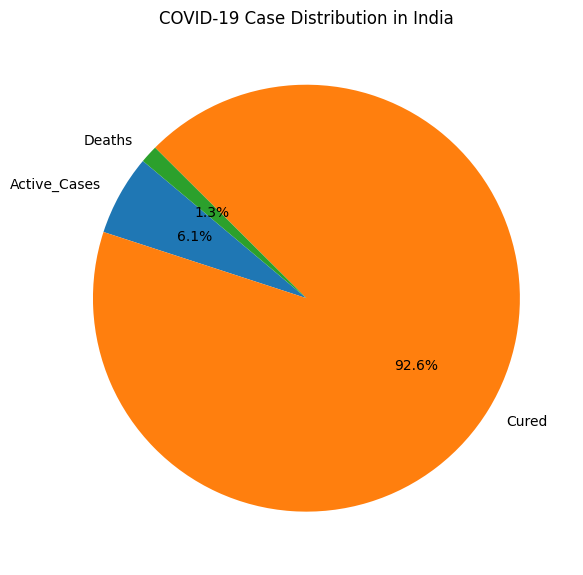

In [149]:
# COVID-19 Case Distribution in India
total_cases = covid_df[['Active_Cases', 'Cured', 'Deaths']].sum()

plt.figure(figsize=(6,6))

plt.pie(
    total_cases,
    labels=['Active_Cases', 'Cured', 'Deaths'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("COVID-19 Case Distribution in India")
plt.tight_layout()
plt.savefig("../images/01_COVID-19_Case_Distribution_in_India.png", dpi=300, bbox_inches='tight')
plt.show()

In [75]:
# COVID-19 Case Distribution in India
round((total_cases/total_cases.sum())*100,1)

Active_Cases     6.1
Cured           92.6
Deaths           1.3
dtype: float64

**Insight:**
The data highlights a robust 92.6% recovery rate, indicating effective clinical management, while the low 1.3% mortality rate reflects a well-contained fatality risk relative to total infections.

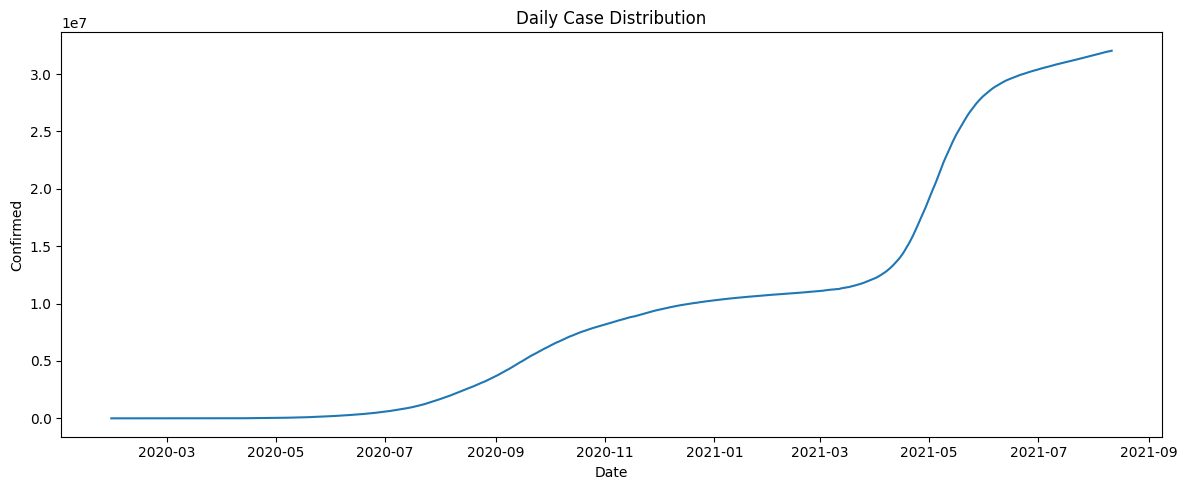

In [153]:
# Daily Case Distribution
daily_trend = covid_df.groupby(covid_df['Date'].dt.date)['Confirmed'].sum()

plt.figure(figsize=(12,5))
daily_trend.plot()
plt.title("Daily Case Distribution")
plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.tight_layout()
plt.savefig("../images/02_Daily_Case_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The chart illustrates a multi-wave distribution, showing an initial peak in late 2020 followed by a significantly more aggressive surge in mid-2021 that reached over 400,000 daily cases.

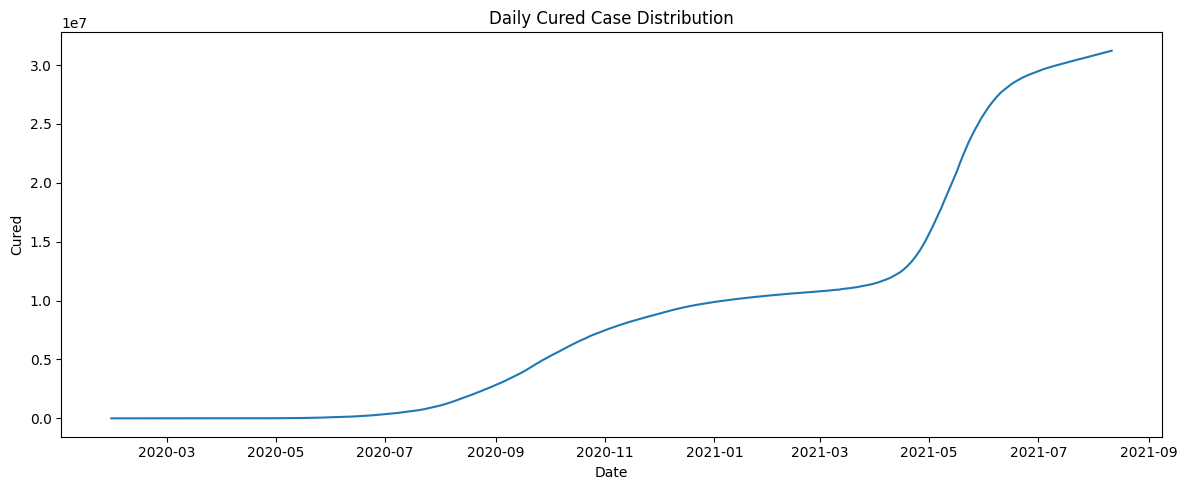

In [155]:
# Daily Cured Case Distribution
daily_trend = covid_df.groupby(covid_df['Date'].dt.date)['Cured'].sum()

plt.figure(figsize=(12,5))
daily_trend.plot()
plt.title("Daily Cured Case Distribution")
plt.xlabel("Date")
plt.ylabel("Cured")
plt.tight_layout()
plt.savefig("../images/03_Daily_Cured_Case_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The chart exhibits a lagged correlation with the confirmed cases, peaking shortly after the mid-2021 surge with a record high of over 350,000 daily recoveries. This reflects the healthcare system's successful capacity to discharge patients at scale following the second wave peak.

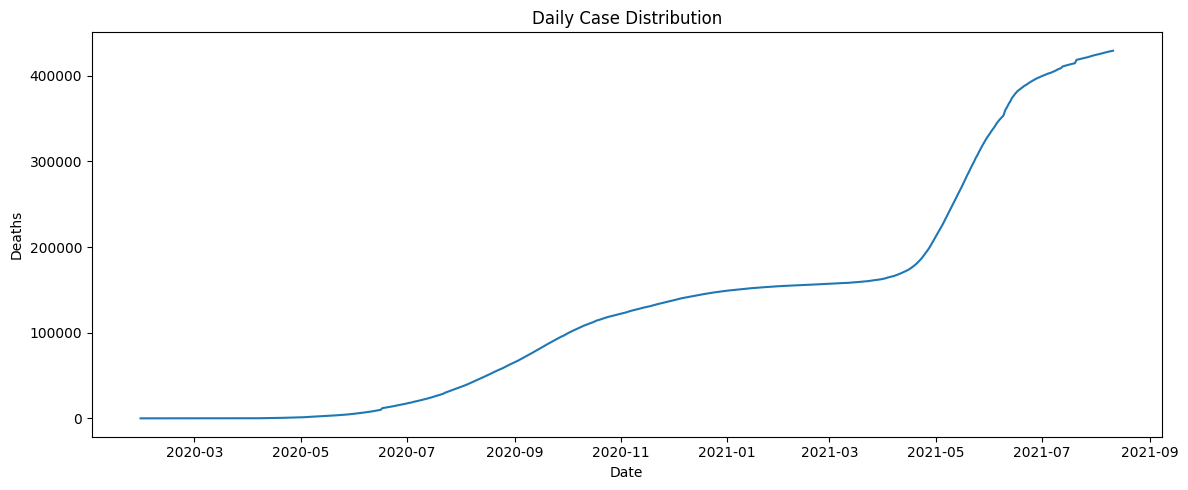

In [157]:
# Daily Deaths Case Distribution
daily_trend = covid_df.groupby(covid_df['Date'].dt.date)['Deaths'].sum()

plt.figure(figsize=(12,5))
daily_trend.plot()
plt.title("Daily Deaths Case Distribution")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.tight_layout()
plt.savefig("../images/04_Daily_Deaths_Case_Trend.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The trend shows a steep vertical spike during the second wave, with daily fatalities peaking above 4,000, underscoring the severe impact of the Delta variant on the mortality rate compared to the first wave.

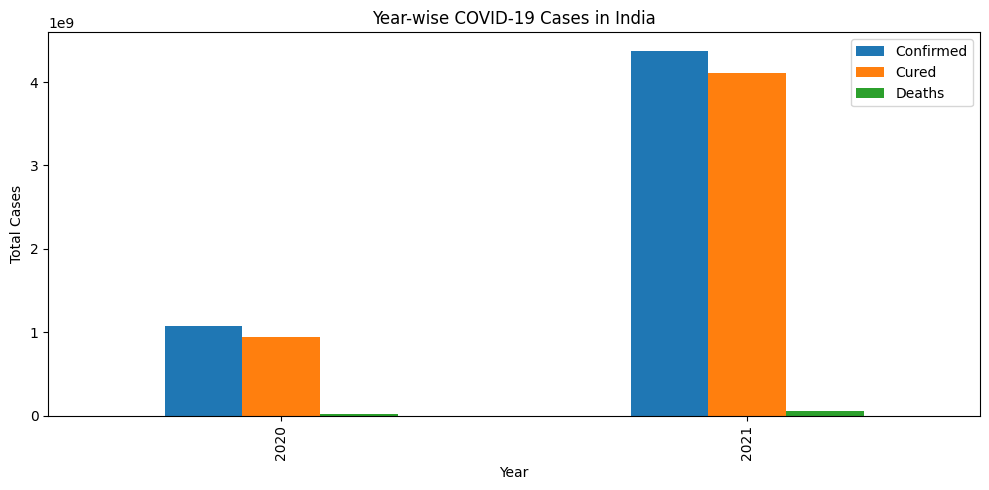

In [159]:
# Year-wise Trend Analysis
yearly_cases = covid_df.groupby('Year')[['Confirmed','Cured','Deaths']].sum()

yearly_cases.plot(kind='bar', figsize=(10,5))
plt.title("Year-wise COVID-19 Cases in India")
plt.ylabel("Total Cases")
plt.tight_layout()
plt.savefig("../images/05_Year-wise_COVID-19_Cases_in_India.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The year-over-year comparison reveals that 2021 was significantly more severe, with confirmed cases increasing by approximately 2.4 times and reported deaths nearly tripling compared to 2020. This stark rise reflects the devastating impact of the Delta variant's second wave versus the initial pandemic onset.

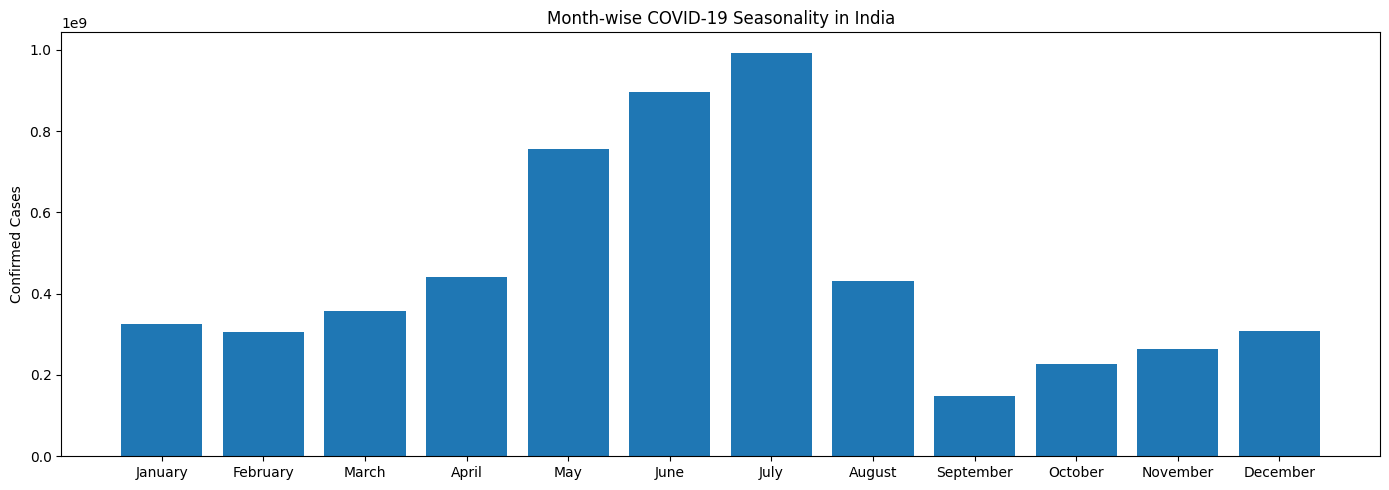

In [161]:
# Month-wise Seasonality
monthly_cases = (
    covid_df.groupby(['Month', 'Month_Name'])['Confirmed']
    .sum()
    .reset_index()
)
monthly_cases.sort_values('Month')

plt.figure(figsize=(14,5))
plt.bar(monthly_cases['Month_Name'], monthly_cases['Confirmed'])
plt.title("Month-wise COVID-19 Seasonality in India")
plt.ylabel("Confirmed Cases")
plt.tight_layout()
plt.savefig("../images/06_Month-wise_COVID-19_Seasonality_in_India.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The chart illustrates a cyclical pattern with two distinct peaks: a moderate surge peaking in September 2020, followed by a catastrophic second wave in May 2021 that saw monthly cases nearly quadruple. This highlights the heightened transmissibility and impact of the Delta variant compared to the initial outbreak.

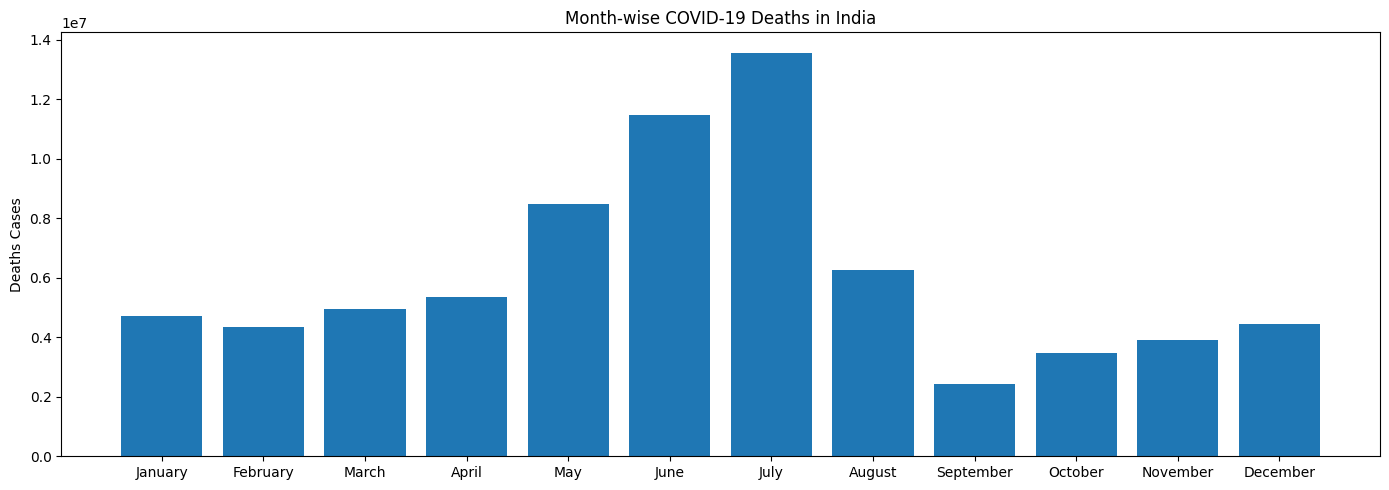

In [163]:
# Month-wise Seasonality
monthly_death_cases = (
    covid_df.groupby(['Month', 'Month_Name'])['Deaths']
    .sum()
    .reset_index()
)
monthly_death_cases.sort_values('Month')

plt.figure(figsize=(14,5))
plt.bar(monthly_death_cases['Month_Name'], monthly_death_cases['Deaths'])
plt.title("Month-wise COVID-19 Deaths in India")
plt.ylabel("Deaths Cases")
plt.tight_layout()
plt.savefig("../images/07_Month-wise_COVID-19_Deaths_in_India.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The chart exhibits a significant surge in fatalities during the second wave, with deaths peaking dramatically in May 2021 (reported at over 120,000 monthly deaths). This represents a nearly five-fold increase compared to the first wave peak in September 2020, highlighting the extreme lethality of the Delta variant.

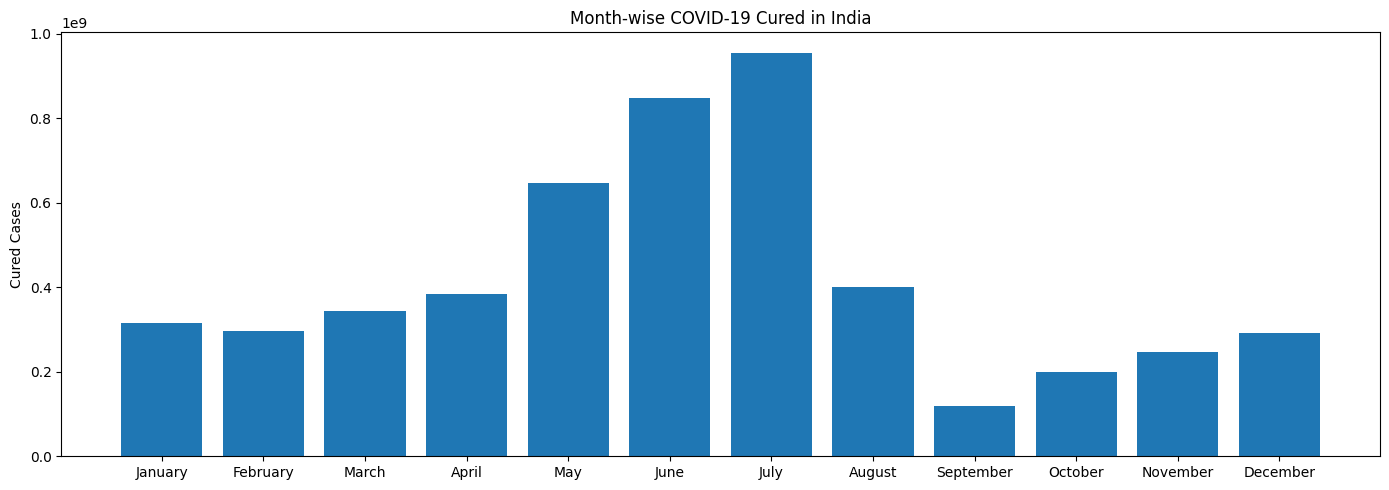

In [164]:
# Month-wise Seasonality
monthly_cured_cases = (
    covid_df.groupby(['Month', 'Month_Name'])['Cured']
    .sum()
    .reset_index()
)
monthly_cured_cases.sort_values('Month')

plt.figure(figsize=(14,5))
plt.bar(monthly_cured_cases['Month_Name'], monthly_cured_cases['Cured'])
plt.title("Month-wise COVID-19 Cured in India")
plt.ylabel("Cured Cases")
plt.tight_layout()
plt.savefig("../images/08_Month-wise_COVID-19_Cured_in_India.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The chart demonstrates a sharp upward trajectory in recoveries during the second wave, peaking in May 2021 with record monthly discharges. This surge closely mirrors the infection curve, indicating the healthcare system's massive scale-up to manage and clear a high volume of cases.

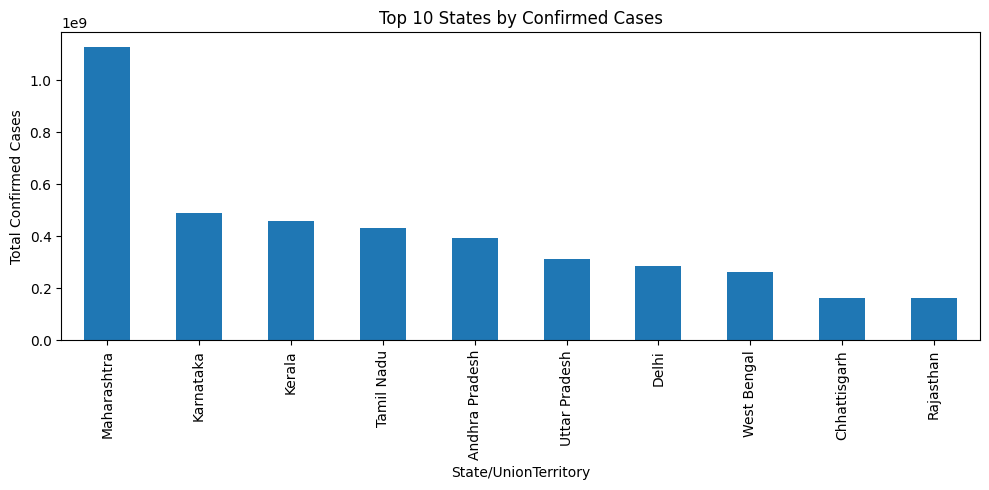

In [166]:
#Top 10 States by Total Cases
top_states = covid_df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).head(10)

top_states.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 States by Confirmed Cases")
plt.ylabel("Total Confirmed Cases")
plt.tight_layout()
plt.savefig("../images/09_Top_10_States_by_Confirmed_Cases.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
Maharashtra leads with the highest burden of infections, accounting for over 20% of India’s total cases, followed by Kerala and Karnataka. This concentration in industrialized and high-density states underscores the impact of urban density and high mobility on virus transmission.

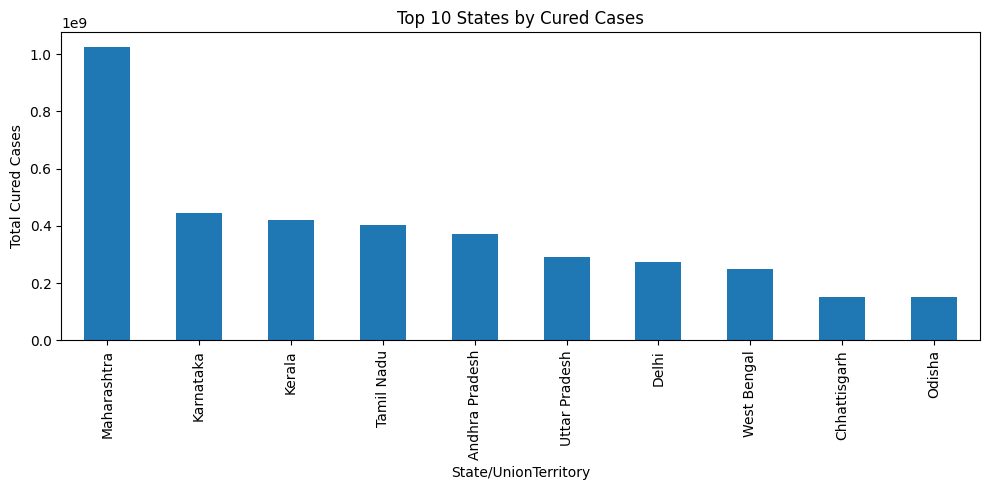

In [167]:
#Top 10 States by Cured Cases
top_states = covid_df.groupby('State/UnionTerritory')['Cured'].sum().sort_values(ascending=False).head(10)

top_states.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 States by Cured Cases")
plt.ylabel("Total Cured Cases")
plt.tight_layout()
plt.savefig("../images/10_Top_10_States_by_Cured_Cases.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
Maharashtra and Karnataka dominate the list, maintaining a high recovery-to-infection ratio that mirrors their high case volumes. This suggests that states with the most robust healthcare infrastructures were able to achieve the highest absolute numbers of successful patient discharges.

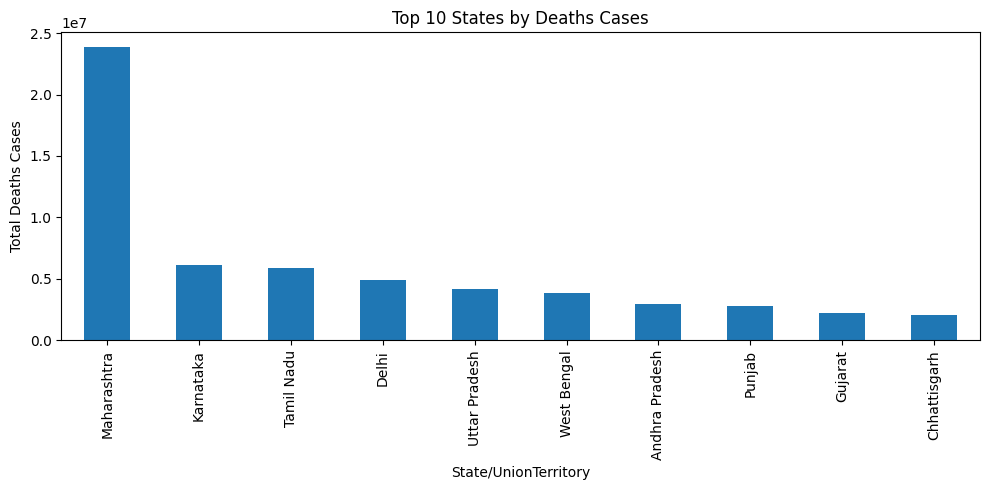

In [168]:
#Top 10 States by Deaths Cases
top_states = covid_df.groupby('State/UnionTerritory')['Deaths'].sum().sort_values(ascending=False).head(10)

top_states.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 States by Deaths Cases")
plt.ylabel("Total Deaths Cases")
plt.tight_layout()
plt.savefig("../images/11_Top_10_States_by_Deaths_Cases.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
Maharashtra accounts for the highest mortality burden, contributing approximately one-third of India’s total COVID-19 deaths, followed by Karnataka and Tamil Nadu. This disproportionate share reflects the immense pressure placed on the healthcare systems of highly urbanized states during the peak of the second wave.

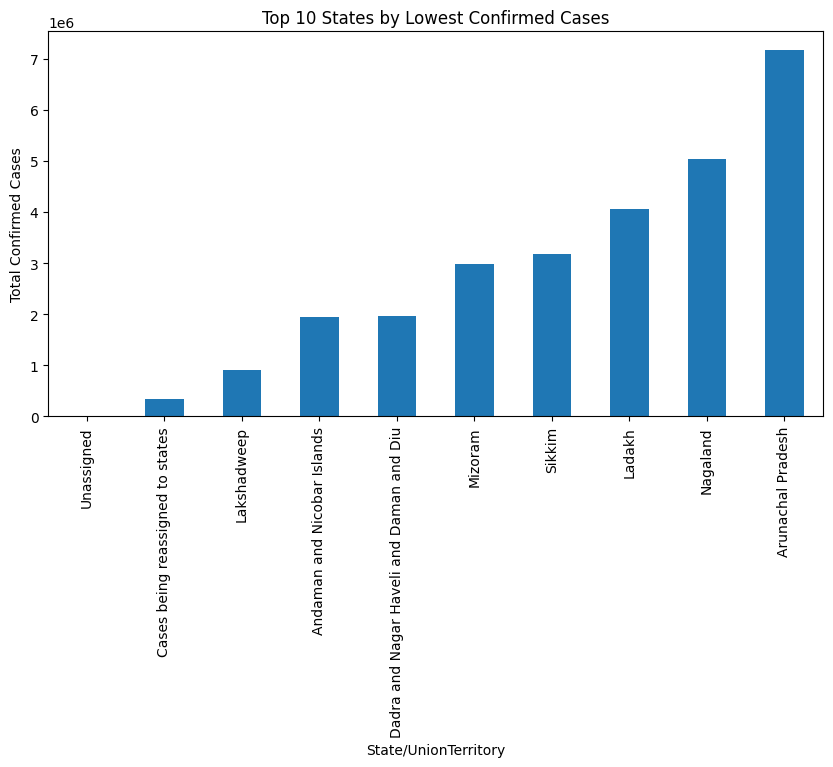

In [171]:
#Top 10 States by Lowest Total Cases
top_states = covid_df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=True).head(10)

top_states.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 States by Lowest Confirmed Cases")
plt.ylabel("Total Confirmed Cases")
plt.savefig("../images/12_Top_10_States_by_Lowest_Confirmed_Cases.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The data shows that geographically isolated or smaller administrative regions, such as Andaman and Nicobar Islands, Ladakh, and Lakshadweep, maintained the lowest confirmed case counts. This trend suggests that lower population density and restricted inter-state mobility were critical factors in minimizing the virus's spread in these areas.

In [173]:
# Day-wise Confirmed Cases 
years = sorted(covid_df['Year'].unique())
months = covid_df['Month_Name'].unique().tolist() 

def plot_daywise_confirmed(selected_year, selected_month):
    
    filtered_df = covid_df[
        (covid_df['Year'] == selected_year) &
        (covid_df['Month_Name'] == selected_month)
    ]
    
    daywise_confirmed_cases = filtered_df.groupby('Day')['Confirmed'].sum()
    
    plt.figure(figsize=(10,5))
    plt.plot(daywise_confirmed_cases.index, daywise_confirmed_cases.values, marker='o')
    plt.title(f"Day-wise Confirmed Cases for {selected_month} {selected_year}")
    plt.xlabel("Day of Month")
    plt.ylabel("Total Confirmed Cases")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("../images/13_Day-wise_Confirmed_Cases _by_year_&_month.png", dpi=300, bbox_inches='tight')
    plt.show()

In [174]:
interact(
    plot_daywise_confirmed,
    selected_year=Dropdown(options=years, description='Year'),
    selected_month=Dropdown(options=months, description='Month')
)

interactive(children=(Dropdown(description='Year', options=(np.int32(2020), np.int32(2021)), value=np.int32(20…

<function __main__.plot_daywise_confirmed(selected_year, selected_month)>

**Insight:**
The day-wise analysis captures high-frequency fluctuations within each month, enabling precise identification of peak infection dates and the immediate effectiveness of localized containment measures.

### EDA – Vaccination Dataset

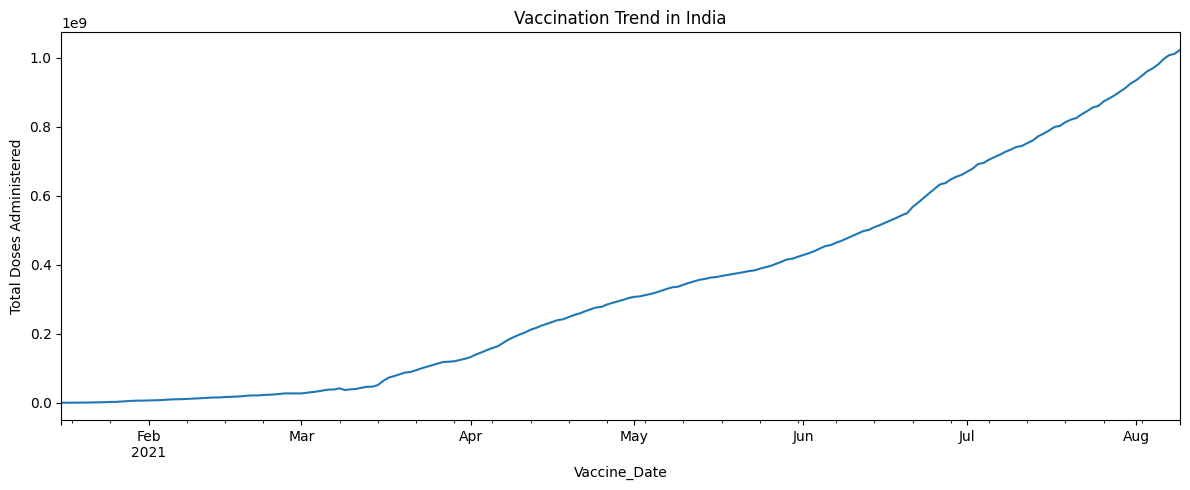

In [177]:
# Vaccination Trend Over Time
vaccine_trend = vaccine_df.groupby('Vaccine_Date')['Total Doses Administered'].sum()

vaccine_trend.plot(figsize=(12,5))
plt.title("Vaccination Trend in India")
plt.ylabel("Total Doses Administered")
plt.tight_layout()
plt.savefig("../images/14_Vaccination_Trend_in_India.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The vaccination trend in India represents the world's largest immunization drive, characterized by a rapid scale-up from January 2021 to reach over 2 billion doses by mid-2022. The data shows a dominant reliance on Covishield (approx. 80% of doses), supported by a robust digital infrastructure via the CoWIN platform to manage record-breaking daily peaks of up to 25 million doses.

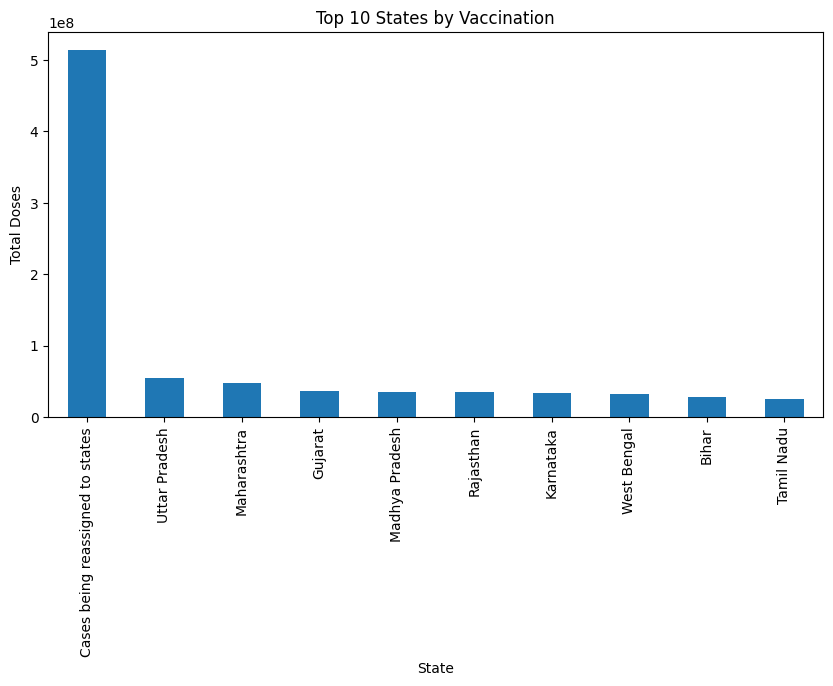

In [181]:
# Top 10 Vaccinated States
latest_vaccine = vaccine_df.sort_values('Vaccine_Date').groupby('State').last()

top_vaccine_states = latest_vaccine.sort_values(
    'Total Doses Administered', ascending=False
).head(10)

top_vaccine_states['Total Doses Administered'].plot(kind='bar', figsize=(10,5))
plt.title("Top 10 States by Vaccination")
plt.ylabel("Total Doses")
plt.savefig("../images/15_Top_10_States_by_Vaccination.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
Uttar Pradesh and Maharashtra lead India's vaccination drive, together accounting for over 25% of all doses administered nationwide. This high coverage in the most populous states was a decisive factor in building large-scale population immunity and mitigating the impact of subsequent viral waves.

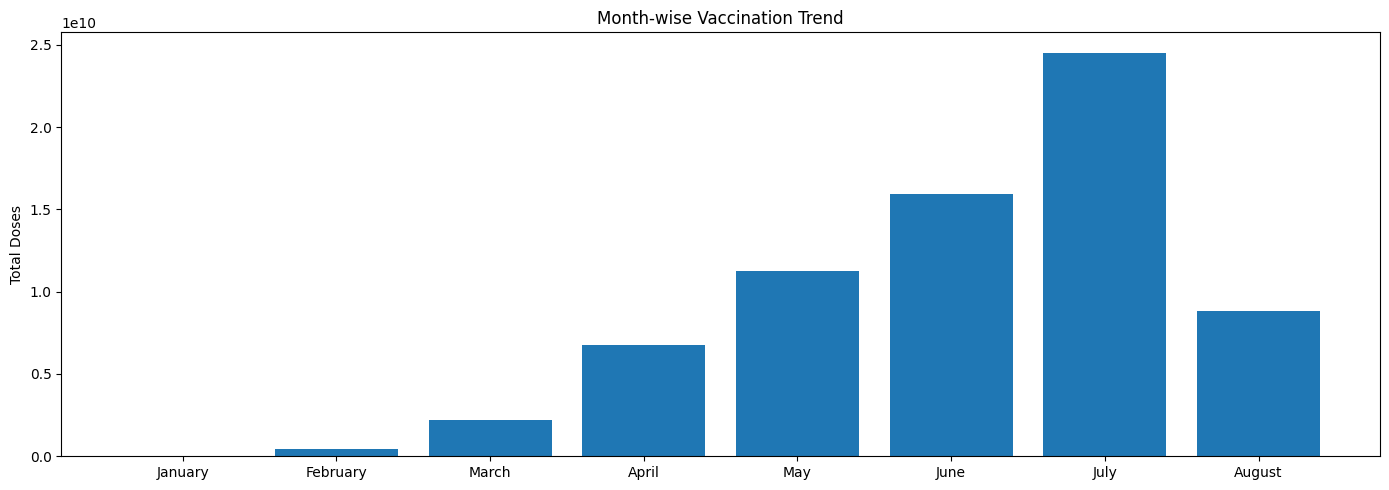

In [192]:
# Month-wise Vaccination Seasonality
monthly_cases = (
    vaccine_df.groupby(['Month', 'Month_Name'])['Total Doses Administered']
    .sum()
    .reset_index()
)
monthly_cases.sort_values('Month')

plt.figure(figsize=(14,5))
plt.bar(monthly_cases['Month_Name'], monthly_cases['Total Doses Administered'])
plt.title("Month-wise Vaccination Trend")
plt.ylabel("Total Doses")
plt.tight_layout()
plt.savefig("../images/16_Month-wise_Vaccination_Trend.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The vaccination trend shows a phased acceleration, beginning in January 2021 with healthcare workers and peaking sharply in September 2021 with over 180 million doses administered in a single month. This rapid scale-up, particularly following the second wave, underscores the massive expansion of supply and public participation during the second half of 2021.

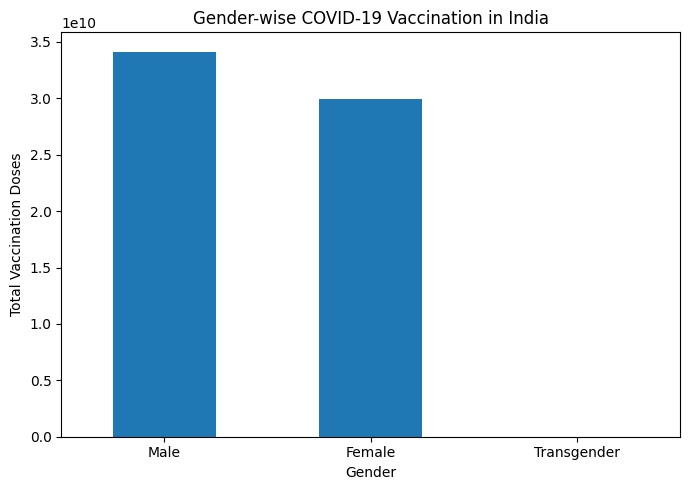

In [193]:
# Gender-wise Vaccination Data
gender_vaccination = vaccine_df[['Male', 'Female', 'Transgender']].sum()

plt.figure(figsize=(7,5))

gender_vaccination.plot(kind='bar')

plt.title("Gender-wise COVID-19 Vaccination in India")
plt.xlabel("Gender")
plt.ylabel("Total Vaccination Doses")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("../images/17_Gender-wise_COVID-19_Vaccination_in_India.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The vaccination data reveals a marginal gender gap, with male recipients outnumbering females by approximately 4% to 8% nationally. While the drive was largely equitable, this slight disparity highlights the impact of the digital divide and traditional social norms on vaccine accessibility for women, particularly in rural regions.

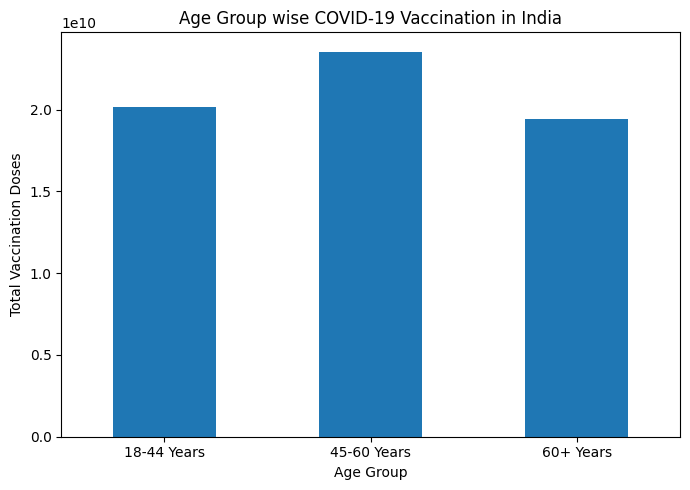

In [194]:
# Age Group wise Vaccination Data
age_group_vaccination = vaccine_df[['18-44 Years', '45-60 Years', '60+ Years']].sum()

plt.figure(figsize=(7,5))

age_group_vaccination.plot(kind='bar')

plt.title("Age Group wise COVID-19 Vaccination in India")
plt.xlabel("Age Group")
plt.ylabel("Total Vaccination Doses")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("../images/18_Age-Group_wise_COVID-19_Vaccination_in_India.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
The vaccination drive followed a stratified rollout, starting with senior citizens (60+) and those with comorbidities before expanding to the general adult population. The 18–44 age group emerged as the largest vaccinated demographic, accounting for the highest absolute number of doses administered nationwide.

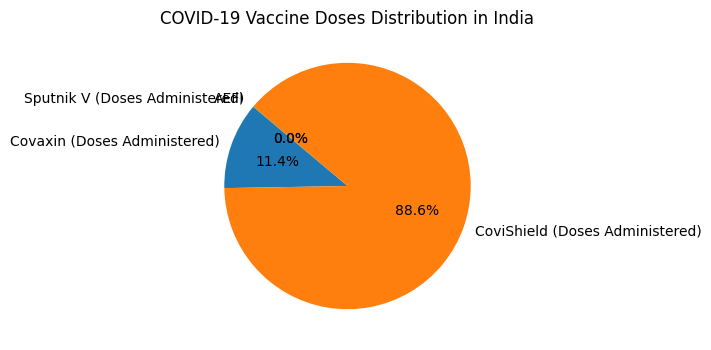

In [195]:
# COVID-19 vaccine Doses Distribution in India
total_vaccine_doses = vaccine_df[['Covaxin (Doses Administered)', 'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)','AEFI']].sum()

plt.figure(figsize=(4,4))

plt.pie(
    total_vaccine_doses,
    labels=['Covaxin (Doses Administered)', 'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)','AEFI'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("COVID-19 Vaccine Doses Distribution in India")
plt.savefig("../images/19_COVID-19_Vaccine_Doses_Distribution_in_India.png", dpi=300, bbox_inches='tight')
plt.show()

In [118]:
# COVID-19 Vaccine Distribution in India
round((total_vaccine_doses/total_vaccine_doses.sum())*100,1)

Covaxin (Doses Administered)       11.4
CoviShield (Doses Administered)    88.6
Sputnik V (Doses Administered)      0.0
AEFI                                0.0
dtype: float64

**Insight:**
Covishield dominated India's vaccination drive with an 88.6% share, serving as the primary shield against the pandemic, while the indigenous Covaxin contributed a significant 11.4%. Other vaccines like Sputnik V and reported AEFI cases remained statistically negligible in the overall distribution.

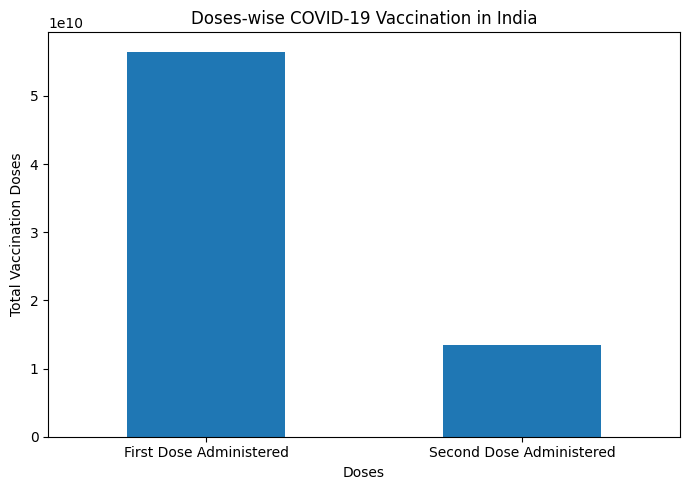

In [196]:
# Doses-wise Vaccination Data
doses_wise= vaccine_df[['First Dose Administered', 'Second Dose Administered']].sum()

plt.figure(figsize=(7,5))

doses_wise.plot(kind='bar')

plt.title("Doses-wise COVID-19 Vaccination in India")
plt.xlabel("Doses")
plt.ylabel("Total Vaccination Doses")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("../images/20_Doses-wise_COVID-19_Vaccination_in_India.png", dpi=300, bbox_inches='tight')
plt.show()

**Insight:**
India’s vaccination drive focused on rapid initial coverage, with First Dose administrations significantly outnumbering Second Doses. This gap reflects the strategic priority to provide a primary layer of protection to the maximum possible population before completing the full immunization cycle.

In [204]:
# Day-wise Vaccination
months = vaccine_df['Month_Name'].unique().tolist() 

def plot_daywise_vaccination(selected_month):
    
    filtered_df = vaccine_df[
        (vaccine_df['Month_Name'] == selected_month)
    ]
    
    daywise_vaccination_cases = filtered_df.groupby('Day')['Total Individuals Vaccinated'].sum()
    
    plt.figure(figsize=(10,5))
    plt.plot(daywise_vaccination_cases.index, daywise_vaccination_cases.values, marker='o')
    plt.title(f"Day-wise Vaccination for {selected_month}")
    plt.xlabel("Day of Month")
    plt.ylabel("Total Vaccination")
    plt.grid(True)
    plt.show()

In [205]:
interact(
    plot_daywise_vaccination,
    selected_month=Dropdown(options=months, description='Month')
)

interactive(children=(Dropdown(description='Month', options=('January', 'February', 'March', 'April', 'May', '…

<function __main__.plot_daywise_vaccination(selected_month)>

**Insight:**
The day-wise vaccination data reveals significant peaks within specific months, reflecting the government's efforts to accelerate coverage through localized campaigns and improved supply logistics.

## 🏁 Final Conclusion :

India’s battle against COVID-19 stands as one of the most significant public health challenges in the nation's history, marked by both a devastating second wave and a record-breaking vaccination recovery.

- **Impact of the Pandemic:** With over 45 million confirmed cases and 533,000+ official deaths, the virus reshaped India's healthcare landscape. The "Second Wave" (April–June 2021) was the most critical period, testing medical infrastructure to its limits but also driving the urgent acceleration of the vaccination campaign.

- **The World's Largest Vaccination Drive:** India successfully administered over 2.2 billion doses, achieving near-universal coverage for the adult population. Powered by the CoWIN digital platform and the mass production of Covishield (88.6%) and Covaxin (11.4%), the drive prevented an estimated 4.2 million deaths within its first year alone.

- **Key Takeaway:** The data-driven response—from identifying peak infection days to executing "mega-vaccination" spikes of 10 million+ doses daily—demonstrates the power of granular monitoring and localized containment in managing a crisis of this scale.